
## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Capstone Project

### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(IBM Data Science Professional Certificate)




        
# &emsp; Making MONEY by Opening A Chinese Restaurant in Sydney


##          &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  &emsp;  &emsp;&emsp;                              _By: Jinwen Tu @Sydney_

###  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  &emsp;    &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;   &emsp;&emsp;   &emsp;                                                         _July, 2019_

## Introduction

__Sydney__ is the state capital of New South Wales and the most populous city in Australia and Oceania. Sydney is made up of 658 suburbs, 40 local government areas and 15 contiguous regions. As of June 2017, Sydney's estimated metropolitan population was 5,230,330 and is home to approximately 65% of the state's population. 

Despite being one of the most expensive cities in the world, the 2018 Mercer Quality of Living Survey ranks Sydney tenth in the world in terms of quality of living, making it one of the most livable cities. In addition, Sydney is one of the most attractive cities for Chinese people as tourists and residents. In 2015-16 Mainland China (not including Hong Kong or Macau) was the second largest source of immigrants to Australia behind India. At the 2016 census, Sydney was home to 44% of the Mainland China-born population of Australia, while Melbourne was home to 31%. At the 2016 census, 487,976 (or 10.8%) of the inhabitants of Sydney who nominated their ancestry nominated Chinese ancestry solely or along with another ancestry. 
 
Based on the large population of Chinese in Sydney, Chinese restaurants are very profitable and thus a wise choice for investment.

## Business Problem

The objective of this capstone project is therfore to provide strategic guidance to __investors__ on how to maximum the profit of opening a Chinese restaurant in Sydney, by analysing the location information as well as review information of the exsiting Chinese restaurants in all the suburbs of Syney using data science methodology and machine learning models. The guidance will include how to choose the location of the restaurant, what category of Chinese food is most popular, what features of a Chinese restaurants are most important to attract customer, etc. 

## Data wrangling and analysis

### 1. Extract the list of sydney suburbs from the Wikipedia website

In [1]:
# import modules
import requests
import re
from bs4 import BeautifulSoup

import pandas as pd

In [2]:
# put the url into a variable called url
url = "https://en.wikipedia.org/wiki/List_of_Sydney_suburbs"
# grab content from the url
page = requests.get(url, verify = False)

/Applications/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [718]:
soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
suburbs = [a.get('title') for a in soup.find_all('a', href=True, title=True)]

suburbs_clean = [suburb for suburb in suburbs if suburb.find(', New South Wales') != -1]

len(suburbs_clean)

688

### 2. Get the latitude and longitude information of each suburb

In [17]:
import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [18]:
def do_geocode(address):
    geopy = Nominatim(user_agent='foursquare_agent')#"foursquare_agent"
    try:
        return geopy.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [26]:
suburbs = {}        
for suburb in suburbs_clean:
    outcome_2[suburb] = (do_geocode(suburb).latitude, do_geocode(suburb).longitude)

#### This process is unsteady, and some of the suburbs can not be called, therefore, it took several times to finish by skipping the unavailable suburbs. 

In [27]:
len(suburbs.keys())

673

In [34]:
df_suburb = pd.DataFrame.from_dict(list(suburbs.items()))
df_suburb = df_suburb.rename(columns = {0: 'suburb', 1: 'location'})

print (df_suburb.info())
df_suburb.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 2 columns):
suburb      673 non-null object
location    673 non-null object
dtypes: object(2)
memory usage: 10.6+ KB
None


,suburb,location
0,"Dundas Valley, New South Wales","(-33.7936744, 151.0559069)"
1,"Dural, New South Wales","(-33.6876398, 151.0267199)"
2,"Eagle Vale, New South Wales","(-34.0377778, 150.8111111)"
3,"Earlwood, New South Wales","(-33.9247222, 151.1313889)"
4,"East Hills, New South Wales","(-33.9618532, 150.9846273)"


In [35]:
df_suburb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 2 columns):
suburb      673 non-null object
location    673 non-null object
dtypes: object(2)
memory usage: 10.6+ KB


In [36]:
# extract the latitude and longitude of each suburb
df_suburb['latitude'] = df_suburb['location'].apply(lambda x: x[0])
df_suburb['longitude'] = df_suburb['location'].apply(lambda x: x[1])
df_suburb = df_suburb[['suburb', 'latitude', 'longitude']]

df_suburb.head()

,suburb,latitude,longitude
0,"Dundas Valley, New South Wales",-33.793674,151.055907
1,"Dural, New South Wales",-33.687640,151.026720
2,"Eagle Vale, New South Wales",-34.037778,150.811111
3,"Earlwood, New South Wales",-33.924722,151.131389
4,"East Hills, New South Wales",-33.961853,150.984627


In [37]:
#save the file
df_suburb.to_excel('suburb_locations.xlsx', index = False)

### 3. Map the suburbs

In [38]:
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [43]:
#get latitude and longitude of Sydney
address = 'Sydney, NSW'

latitude = do_geocode(address).latitude
longitude = do_geocode(address).longitude
print(latitude, longitude)

-33.8548157 151.2164539


In [44]:
# create map of Sydney using latitude and longitude values
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, suburb in zip(df_suburb['latitude'], df_suburb['longitude'], df_suburb['suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydney)  
    
map_sydney 

<img src="sydney suburbs.jpeg">

### 4. Extract the venues of all the restaurants in each suburb

In [722]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20190713'
LIMIT = 1000
search_query = 'Chinese Restaurant'
radius = 1000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [548]:
Restaurants = {}

for lat, lng, suburb in zip(df_suburb['latitude'], df_suburb['longitude'], df_suburb['suburb']):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df = json_normalize(venues)
    df['suburb'] = suburb
    Restaurants[suburb] = df
    
restaurants = pd.concat([Restaurants.get(i) for i in Restaurants.keys()])
restaurants.info()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 3
Data columns (total 20 columns):
categories                   3774 non-null object
hasPerk                      3774 non-null object
id                           3774 non-null object
location.address             2830 non-null object
location.cc                  3774 non-null object
location.city                2841 non-null object
location.country             3774 non-null object
location.crossStreet         891 non-null object
location.distance            3774 non-null float64
location.formattedAddress    3774 non-null object
location.labeledLatLngs      3773 non-null object
location.lat                 3774 non-null float64
location.lng                 3774 non-null float64
location.neighborhood        116 non-null object
location.postalCode          2537 non-null object
location.state               3125 non-null object
name                         3774 non-null object
referralId                   3774 non-null ob

In [549]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['suburb', 'name', 'categories'] + [col for col in res.columns if col.startswith('location.')] + ['id']
df_restaurants = restaurants.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_restaurants['categories'] = df_restaurants.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_restaurants.columns = [column.split('.')[-1] for column in df_restaurants.columns]

df_restaurants.head()

,suburb,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,"Dundas Valley, New South Wales",Vulcano Pizzeria & Restaurant,Italian Restaurant,40 Yates Avenue,AU,Dundas Valley,Australia,NaN,61.0,"[40 Yates Avenue, Dundas Valley NSW 2117, Aust...",NaN,-33.794205,151.056078,NaN,2117,NSW,52109f7b11d25b95caa5c785
1,"Dundas Valley, New South Wales",Happy 888 Restaurant,Chinese Restaurant,NaN,AU,NaN,Australia,NaN,980.0,"[New South Wales, Australia]","[{'label': 'display', 'lat': -33.795675, 'lng'...",-33.795675,151.066232,NaN,NaN,New South Wales,56ff7394498e6d512767c04a
0,"Dural, New South Wales",Mountain View Chinese Restaurant,None,Old Northern Road,AU,Dural,Australia,NaN,671.0,"[Old Northern Road, Dural NSW, Australia]","[{'label': 'display', 'lat': -33.6817308949876...",-33.681731,151.028166,NaN,NaN,NSW,4c8348f574d7b60c56ca88d8
1,"Dural, New South Wales",Burning Log Restaurant,BBQ Joint,Old Northern Rd.,AU,Dural,Australia,Galston Rd.,476.0,"[Old Northern Rd. (Galston Rd.), Dural NSW, Au...","[{'label': 'display', 'lat': -33.683416, 'lng'...",-33.683416,151.027585,NaN,NaN,NSW,4dbbe036cda109aa6c8c3269
2,"Dural, New South Wales",Round Corner Chinese,Chinese Restaurant,NaN,AU,NaN,Australia,NaN,1008.0,[Australia],"[{'label': 'display', 'lat': -33.6935622240290...",-33.693562,151.018479,NaN,NaN,NaN,5377251d498e52a00dc38d21


In [550]:
df_restaurants.categories.value_counts()

Chinese Restaurant               888
Japanese Restaurant              235
Indian Restaurant                207
Thai Restaurant                  205
Italian Restaurant               203
Asian Restaurant                 193
Australian Restaurant            153
Restaurant                       143
Café                             110
Vietnamese Restaurant            105
Korean Restaurant                 90
Seafood Restaurant                63
Pizza Place                       61
Medical Center                    45
Lebanese Restaurant               43
Greek Restaurant                  41
Malay Restaurant                  35
Bar                               34
Mediterranean Restaurant          33
Middle Eastern Restaurant         31
Church                            27
French Restaurant                 26
Dim Sum Restaurant                24
Vegetarian / Vegan Restaurant     23
Indonesian Restaurant             23
Spa                               21
Szechuan Restaurant               21
S

#### Since the same restaruants can be extracted to different suburbs, we use the distance to determine the closest suburb that a restaurant belongs to and therefore drop the duplicates.

In [598]:
df_rest = df_restaurants.sort_values(['id','distance']).drop_duplicates(subset = 'id', keep = 'first')
print (df_rest.info())
# print (df.head())
print (len(df_rest.id.unique()))

#save
df_rest.to_excel('restaurants.xlsx', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 1 to 0
Data columns (total 17 columns):
suburb              1847 non-null object
name                1847 non-null object
categories          1763 non-null object
address             1359 non-null object
cc                  1847 non-null object
city                1365 non-null object
country             1847 non-null object
crossStreet         400 non-null object
distance            1847 non-null float64
formattedAddress    1847 non-null object
labeledLatLngs      1846 non-null object
lat                 1847 non-null float64
lng                 1847 non-null float64
neighborhood        52 non-null object
postalCode          1197 non-null object
state               1515 non-null object
id                  1847 non-null object
dtypes: float64(3), object(14)
memory usage: 259.7+ KB
None
1847


In [552]:
df_rest.categories.value_counts()

Chinese Restaurant               466
Thai Restaurant                  114
Asian Restaurant                 111
Indian Restaurant                108
Japanese Restaurant               97
Italian Restaurant                96
Australian Restaurant             65
Restaurant                        64
Vietnamese Restaurant             57
Café                              50
Korean Restaurant                 47
Seafood Restaurant                33
Pizza Place                       31
Medical Center                    19
Mediterranean Restaurant          18
Lebanese Restaurant               18
Greek Restaurant                  17
Church                            15
Middle Eastern Restaurant         14
Indonesian Restaurant             14
Malay Restaurant                  14
Cantonese Restaurant              11
Dim Sum Restaurant                11
Persian Restaurant                11
Vegetarian / Vegan Restaurant     10
BBQ Joint                          9
Spa                                9
T

In [563]:
len(df_rest.suburb.unique())

358

#### In addition to the distance to the central of the suburbs, we also want to know the distances of restaurants to the central of Sydney.

In [619]:
from geopy.distance import vincenty

def distance_calc (row):
    start = (latitude, longitude)
    stop = (row['lat'], row['lng'])

    return vincenty(start, stop).meters

df_rest['distance_to_central'] = df_rest.apply (lambda row: distance_calc(row),axis=1)
df_rest.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  import sys


,suburb,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Chinese,Non_Chinese,distance_to_central
1,"Fairfield East, New South Wales","Pepperleaf Wine Bar, Restaurant & Coffee House",Café,59 Hanson St.,AU,Corryong,Australia,NaN,332.0,"[59 Hanson St., Corryong Australia 3707, Austr...","[{'label': 'display', 'lat': -33.873087, 'lng'...",-33.873087,150.969132,NaN,3707,Australia,4b058748f964a520bb8822e3,0,1,22974.699201
0,"Palm Beach, New South Wales",Jonah's Restaurant & Accommodation,Restaurant,69 Byna Rd,AU,Palm Beach,Australia,NaN,952.0,"[69 Byna Rd, Palm Beach NSW 2108, Australia]","[{'label': 'display', 'lat': -33.60726, 'lng':...",-33.607260,151.329530,NaN,2108,NSW,4b05875cf964a5206d8d22e3,0,1,29390.002911
11,"Dawes Point, New South Wales",Harbourview Hotel,Bar,18 Lower Fort St.,AU,The Rocks,Australia,NaN,91.0,"[18 Lower Fort St., The Rocks NSW 2000, Austra...","[{'label': 'display', 'lat': -33.8566863040528...",-33.856686,151.207524,NaN,2000,NSW,4b05875ef964a520018e22e3,0,1,852.056120
13,"Dawes Point, New South Wales",The MCA Cafe & Sculpture Terrace,Café,140 George St,AU,The Rocks,Australia,NaN,341.0,"[140 George St, The Rocks NSW 2000, Australia]","[{'label': 'display', 'lat': -33.8595117625733...",-33.859512,151.209228,NaN,2000,NSW,4b05875ef964a5200f8e22e3,0,1,847.609678
22,"Dawes Point, New South Wales",Quay,Australian Restaurant,Overseas Passenger Terminal,AU,Sydney,Australia,Hickson Rd.,313.0,"[Overseas Passenger Terminal (Hickson Rd.), Sy...","[{'label': 'display', 'lat': -33.8574447636054...",-33.857445,151.210155,NaN,2000,NSW,4b05875ef964a520108e22e3,0,1,651.784366


### 5. Extract Chinese restaurants and append other features 

In [620]:
chinese_restaurants = ['Chinese Restaurant', 'Dumpling Restaurant', 'Dim Sum Restaurant', 'Shanghai Restaurant',
       'Szechuan Restaurant', 'Cantonese Restaurant']

df_rest['Chinese'] = 0
df_rest['Chinese'].loc[df_rest['categories'].isin(chinese_restaurants)] = 1

df_rest['Non_Chinese'] = 0
df_rest['Non_Chinese'].loc[df_rest['Chinese'] == 0] = 1

print(df_rest['Chinese'].value_counts())
print(df_rest['Non_Chinese'].value_counts())

0    1344
1     503
Name: Chinese, dtype: int64
1    1344
0     503
Name: Non_Chinese, dtype: int64


In [561]:
chinese_ids = df_rest[df_rest['Chinese'] == 1].id.unique()
len(chinese_ids)

503

### 5.1 __Count of the likes of restaurants__

In [554]:
# test connection
like_url = 'https://api.foursquare.com/v2/venues/5246894c11d2ac79d7d8c35f?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
like_result = requests.get(like_url).json()

like_result['response']['venue']['likes']#['count']


{'count': 0, 'groups': []}

In [555]:
likes_dict_all = {}
for venue_id in df_rest.id.value_counts().index:
    like_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    like_result = requests.get(like_url).json()
    
    try:
        likes = like_result['response']['likes']['count']
    except:
        likes = -1
    
    likes_dict_all[venue_id] = likes

In [556]:
len(likes_dict_all.keys())

1847

In [558]:
likes_rerun_list = []
for i in likes_dict_all.keys():
    if likes_dict_all.get(i) == -1:
        likes_rerun_list.append(i)

print(len(likes_rerun_list))  

0


In [559]:

df_likes = pd.DataFrame.from_dict(likes_dict_all, orient='index')
df_likes = df_likes.reset_index().rename(columns = {'index': 'id', 0: 'likes'})

#print (df_price.info())
df_likes.head()

#save the file
df_likes.to_excel('likes.xlsx', index = False)


### 5.2 __Count of the price of restaurants__

In [600]:
#test connection
url = 'https://api.foursquare.com/v2/venues/4b80f1c1f964a520db9230e3?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()


In [454]:
price_dict_all = {}
for venue_id in df.id.value_counts().index:
    price_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    price_result = requests.get(price_url).json()
    
    try:
        price = price_result['response']['venue']['price']['tier']
    except:
        price =  -1
    
    price_dict_all[venue_id] = price

In [455]:
len(price_dict_all.keys())

1597

In [562]:
price_dict_chinese = {}
for venue_id in chinese_ids:
    price_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    price_result = requests.get(price_url).json()
    
    try:
        price = price_result['response']['venue']['price']['tier']
    except:
        price =  -1
    
    price_dict_chinese[venue_id] = price

In [568]:
price_rerun_list = []
for i in price_dict_chinese.keys():
    if price_dict_chinese.get(i) == -1:
        price_rerun_list.append(i)

print(len(price_rerun_list)) 

22


In [567]:

for venue_id in price_rerun_list:
    price_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    price_result = requests.get(price_url).json()
    
    try:
        price = price_result['response']['venue']['price']['tier']
    except:
        price =  -1
    
    price_dict_chinese[venue_id] = price

In [569]:
df_price = pd.DataFrame.from_dict(price_dict_chinese, orient='index')
df_price = df_price.reset_index().rename(columns = {'index': 'id', 0: 'price'})

#print (df_price.info())
df_price.head()

#save the file
df_price.to_excel('price.xlsx', index = False)


### 5.3 __Count of the ratings of the Chinese restaurants__

In [721]:
# test connections
url = 'https://api.foursquare.com/v2/venues/4f0b89bfe4b06351611c41ee?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()


In [571]:
rating_dict = {}
for venue_id in chinese_ids:
    rating_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    rating_result = requests.get(rating_url).json()
    
    try:
        rating = rating_result['response']['venue']['rating']
    except:
        rating = -1
    
    rating_dict[venue_id] = rating


In [575]:
len(rating_dict.keys())

503

In [581]:
rerun_list = []
for i in rating_dict.keys():
    if rating_dict.get(i) == -1:
        rerun_list.append(i)

print(len(rerun_list))        

405


In [578]:
rerun_list.index('59a133d682a75011a4fcbdde')

364

In [580]:
for venue_id in rerun_list[364:]:
    rating_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    rating_result = requests.get(rating_url).json()
    
    try:
        rating = rating_result['response']['venue']['rating']
    except:
        rating = -1
    
    rating_dict[venue_id] = rating

#### Need to be noted, that many of the restaurants don't have a rating.

In [582]:
df_rating = pd.DataFrame.from_dict(rating_dict, orient='index')
df_rating = df_rating.reset_index().rename(columns = {'index': 'id', 0: 'rating'})

print (df_rating.info())
print (df_rating.head())

#save the file
df_rating.to_excel('rating.xlsx', index = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
id        503 non-null object
rating    503 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None
                         id  rating
0  4b058766f964a520709022e3     6.9
1  4b058766f964a520729022e3     7.7
2  4b058766f964a520939022e3     7.2
3  4b058769f964a520279122e3    -1.0
4  4b0752bdf964a52000fc22e3     6.5


### 5.4 __Append the above features to the restaurants__

In [621]:
df_rest.columns

Index(['suburb', 'name', 'categories', 'address', 'cc', 'city', 'country',
       'crossStreet', 'distance', 'formattedAddress', 'labeledLatLngs', 'lat',
       'lng', 'neighborhood', 'postalCode', 'state', 'id', 'Chinese',
       'Non_Chinese', 'distance_to_central'],
      dtype='object')

In [622]:
df1 = pd.merge(df_likes, df_price, how = 'outer', on = ['id', 'id'])
df2 = pd.merge(df1, df_rating, how = 'left', on = ['id', 'id'])
df3 = pd.merge(df_rest, df2, how = 'left', on = ['id', 'id'])

print(df3.info())

df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 1846
Data columns (total 23 columns):
suburb                 1847 non-null object
name                   1847 non-null object
categories             1763 non-null object
address                1359 non-null object
cc                     1847 non-null object
city                   1365 non-null object
country                1847 non-null object
crossStreet            400 non-null object
distance               1847 non-null float64
formattedAddress       1847 non-null object
labeledLatLngs         1846 non-null object
lat                    1847 non-null float64
lng                    1847 non-null float64
neighborhood           52 non-null object
postalCode             1197 non-null object
state                  1515 non-null object
id                     1847 non-null object
Chinese                1847 non-null int64
Non_Chinese            1847 non-null int64
distance_to_central    1847 non-null float64
likes         

,suburb,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,...,neighborhood,postalCode,state,id,Chinese,Non_Chinese,distance_to_central,likes,price,rating
0,"Fairfield East, New South Wales","Pepperleaf Wine Bar, Restaurant & Coffee House",Café,59 Hanson St.,AU,Corryong,Australia,NaN,332.0,"[59 Hanson St., Corryong Australia 3707, Austr...",...,NaN,3707,Australia,4b058748f964a520bb8822e3,0,1,22974.699201,0,NaN,NaN
1,"Palm Beach, New South Wales",Jonah's Restaurant & Accommodation,Restaurant,69 Byna Rd,AU,Palm Beach,Australia,NaN,952.0,"[69 Byna Rd, Palm Beach NSW 2108, Australia]",...,NaN,2108,NSW,4b05875cf964a5206d8d22e3,0,1,29390.002911,47,NaN,NaN
2,"Dawes Point, New South Wales",Harbourview Hotel,Bar,18 Lower Fort St.,AU,The Rocks,Australia,NaN,91.0,"[18 Lower Fort St., The Rocks NSW 2000, Austra...",...,NaN,2000,NSW,4b05875ef964a520018e22e3,0,1,852.056120,51,NaN,NaN
3,"Dawes Point, New South Wales",The MCA Cafe & Sculpture Terrace,Café,140 George St,AU,The Rocks,Australia,NaN,341.0,"[140 George St, The Rocks NSW 2000, Australia]",...,NaN,2000,NSW,4b05875ef964a5200f8e22e3,0,1,847.609678,95,NaN,NaN
4,"Dawes Point, New South Wales",Quay,Australian Restaurant,Overseas Passenger Terminal,AU,Sydney,Australia,Hickson Rd.,313.0,"[Overseas Passenger Terminal (Hickson Rd.), Sy...",...,NaN,2000,NSW,4b05875ef964a520108e22e3,0,1,651.784366,136,NaN,NaN


In [623]:
df3.describe()

,distance,lat,lng,Chinese,Non_Chinese,distance_to_central,likes,price,rating
count,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,503.000000,503.000000
mean,494.680563,-33.873791,151.105573,0.272334,0.727666,14913.946386,5.864104,1.073559,0.456064
std,285.269567,0.108477,0.125065,0.445281,0.445281,12879.780749,22.817483,0.722819,2.984375
min,9.000000,-34.428769,150.662323,0.000000,0.000000,341.364565,0.000000,-1.000000,-1.000000
25%,259.500000,-33.912775,151.032590,0.000000,0.000000,5539.464899,0.000000,1.000000,-1.000000
50%,457.000000,-33.876050,151.127016,0.000000,1.000000,12244.953708,0.000000,1.000000,-1.000000
75%,699.000000,-33.815363,151.203770,1.000000,1.000000,20095.671188,3.000000,1.000000,-1.000000
max,1340.000000,-33.384435,151.329938,1.000000,1.000000,69978.560952,472.000000,4.000000,8.100000


## 6. Preprocessing and exploratory data analysis

In [586]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

### 6.1 Convert suburb to numeric values based on 1) the total number of restaurants in the suburb; 2) the percentage of Chinese restaurants in the suburb.

In [624]:
df3.suburb = df3.suburb.apply(lambda x:x.split(',')[0])

print(df3.suburb.value_counts().index[:9])

Index(['Eastwood', 'Chatswood', 'Pyrmont', 'Haymarket', 'Harris Park',
       'Osborne Park', 'Auburn', 'Burwood', 'Kingsford'],
      dtype='object')


In [625]:
df3['restaurant'] = 1

df_summary = df3.groupby('suburb').sum().reset_index()

df_summary['percent'] = round(100*df_summary['Chinese']/df_summary['restaurant'], 2)

df_summary.head()

,suburb,distance,lat,lng,Chinese,Non_Chinese,distance_to_central,likes,price,rating,restaurant,percent
0,Abbotsford,453.0,-33.846654,151.128319,0,1,8206.643175,0,0.0,0.0,1,0.00
1,Alexandria,1483.0,-67.815812,302.383213,1,1,12644.249774,0,1.0,-1.0,2,50.00
2,Allambie Heights,971.0,-33.779150,151.248227,0,1,8893.367886,0,0.0,0.0,1,0.00
3,Allawah,11285.0,-509.509912,2266.599381,8,7,241363.052819,17,6.0,13.6,15,53.33
4,Annandale,1534.0,-101.654501,453.505771,0,3,16639.086289,0,0.0,0.0,3,0.00


In [626]:
df_summary.describe()

,distance,lat,lng,Chinese,Non_Chinese,distance_to_central,likes,price,rating,restaurant,percent
count,358.000000,358.000000,358.000000,358.000000,358.000000,3.580000e+02,358.00000,358.000000,358.000000,358.000000,358.000000
mean,2552.164804,-174.762270,779.586572,1.405028,3.754190,7.694430e+04,30.25419,1.508380,0.640782,5.159218,32.468966
std,3617.244873,231.374199,1031.850292,2.463328,5.279942,1.472613e+05,101.20282,2.742688,6.412161,6.827594,34.810700
min,9.000000,-1453.012815,150.670017,0.000000,0.000000,1.075877e+03,0.00000,-1.000000,-10.000000,1.000000,0.000000
25%,684.250000,-194.526392,151.215732,0.000000,1.000000,2.182270e+04,0.00000,0.000000,-1.000000,1.000000,0.000000
50%,1353.000000,-101.070554,452.608676,1.000000,2.000000,4.081560e+04,3.00000,1.000000,-0.500000,3.000000,25.000000
75%,2886.250000,-34.017384,867.425908,2.000000,4.000000,8.071751e+04,15.00000,2.000000,0.000000,5.750000,50.000000
max,26499.000000,-33.548192,6496.515825,20.000000,38.000000,2.158077e+06,1023.00000,29.000000,86.100000,43.000000,100.000000


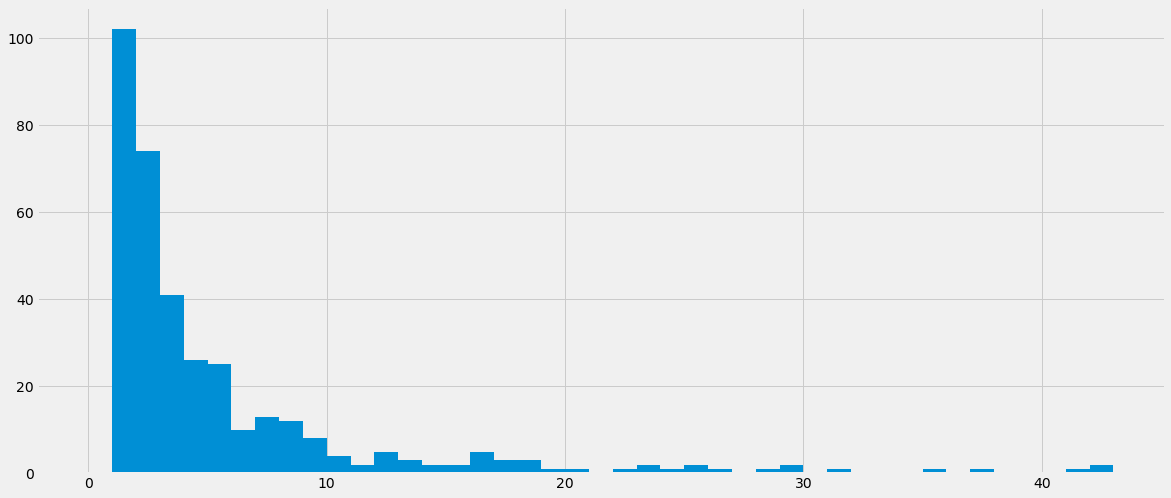

In [627]:
binsize = 1
bins = np.arange(0, df_summary.restaurant.max()+binsize, binsize)

plt.figure(figsize=[18, 8])
plt.hist(data = df_summary, x = 'restaurant', bins = bins)
plt.show()

In [628]:
# group the suburbs to 3 score groups according to the total number of restaurants 

bin_edges = [0,3,6,43]
bin_names = [1,2,3]
df_summary['suburb_total'] = pd.cut(df_summary['restaurant'], bin_edges, labels=bin_names)
df_summary.head()

,suburb,distance,lat,lng,Chinese,Non_Chinese,distance_to_central,likes,price,rating,restaurant,percent,suburb_total
0,Abbotsford,453.0,-33.846654,151.128319,0,1,8206.643175,0,0.0,0.0,1,0.00,1
1,Alexandria,1483.0,-67.815812,302.383213,1,1,12644.249774,0,1.0,-1.0,2,50.00,1
2,Allambie Heights,971.0,-33.779150,151.248227,0,1,8893.367886,0,0.0,0.0,1,0.00,1
3,Allawah,11285.0,-509.509912,2266.599381,8,7,241363.052819,17,6.0,13.6,15,53.33,3
4,Annandale,1534.0,-101.654501,453.505771,0,3,16639.086289,0,0.0,0.0,3,0.00,1


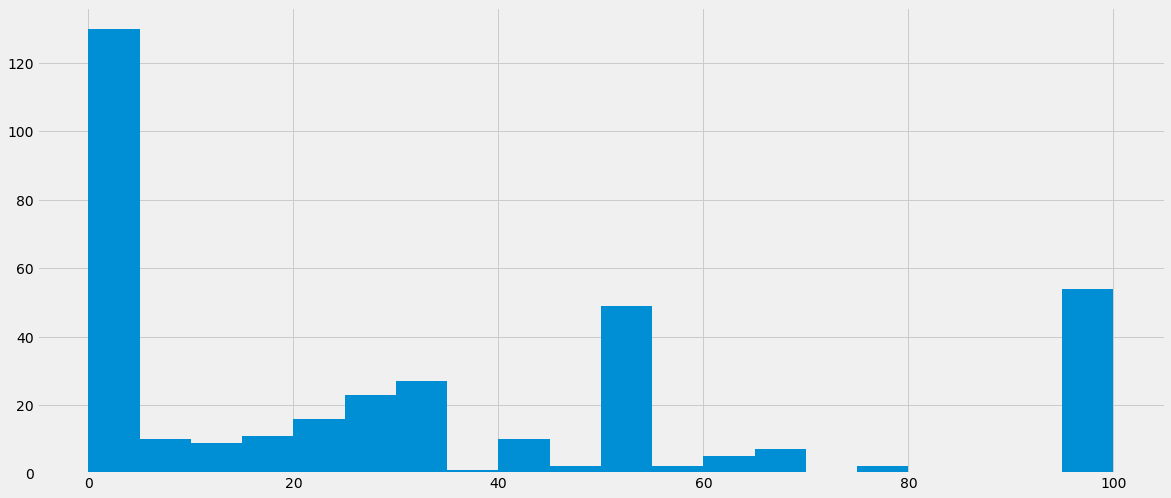

In [629]:
binsize = 5
bins = np.arange(0, df_summary.percent.max()+binsize, binsize)

plt.figure(figsize=[18, 8])
plt.hist(data = df_summary, x = 'percent', bins = bins)
plt.show()

In [630]:
# group the suburbs to 3 score groups according to the percentage of chinese restaurants 

bin_edges = [-1.00,25.00,50.00,100.00]
bin_names = [1,2,3]
df_summary['suburb_percent'] = pd.cut(df_summary['percent'], bin_edges, labels=bin_names)
df_summary.head()

,suburb,distance,lat,lng,Chinese,Non_Chinese,distance_to_central,likes,price,rating,restaurant,percent,suburb_total,suburb_percent
0,Abbotsford,453.0,-33.846654,151.128319,0,1,8206.643175,0,0.0,0.0,1,0.00,1,1
1,Alexandria,1483.0,-67.815812,302.383213,1,1,12644.249774,0,1.0,-1.0,2,50.00,1,2
2,Allambie Heights,971.0,-33.779150,151.248227,0,1,8893.367886,0,0.0,0.0,1,0.00,1,1
3,Allawah,11285.0,-509.509912,2266.599381,8,7,241363.052819,17,6.0,13.6,15,53.33,3,3
4,Annandale,1534.0,-101.654501,453.505771,0,3,16639.086289,0,0.0,0.0,3,0.00,1,1


In [631]:
df3.columns

Index(['suburb', 'name', 'categories', 'address', 'cc', 'city', 'country',
       'crossStreet', 'distance', 'formattedAddress', 'labeledLatLngs', 'lat',
       'lng', 'neighborhood', 'postalCode', 'state', 'id', 'Chinese',
       'Non_Chinese', 'distance_to_central', 'likes', 'price', 'rating',
       'restaurant'],
      dtype='object')

In [632]:
df_summary.columns

Index(['suburb', 'distance', 'lat', 'lng', 'Chinese', 'Non_Chinese',
       'distance_to_central', 'likes', 'price', 'rating', 'restaurant',
       'percent', 'suburb_total', 'suburb_percent'],
      dtype='object')

In [647]:
df_combined = pd.merge(df3[['id', 'suburb','distance','distance_to_central', 'Chinese', 'likes', 'price', 'rating']], 
                       df_summary[['suburb', 'suburb_total', 'suburb_percent']], 
                       how = 'left', on = ['suburb', 'suburb'])
df_combined.head()

,id,suburb,distance,distance_to_central,Chinese,likes,price,rating,suburb_total,suburb_percent
0,4b058748f964a520bb8822e3,Fairfield East,332.0,22974.699201,0,0,NaN,NaN,1,1
1,4b05875cf964a5206d8d22e3,Palm Beach,952.0,29390.002911,0,47,NaN,NaN,1,1
2,4b05875ef964a520018e22e3,Dawes Point,91.0,852.056120,0,51,NaN,NaN,3,1
3,4b05875ef964a5200f8e22e3,Dawes Point,341.0,847.609678,0,95,NaN,NaN,3,1
4,4b05875ef964a520108e22e3,Dawes Point,313.0,651.784366,0,136,NaN,NaN,3,1


### 6.2 Define the popularity of a restaurant based on the number of likes.

In [682]:
df_combined.rating.value_counts()

-1.0    405
 7.1      9
 6.9      7
 5.7      7
 6.7      6
 7.4      5
 6.5      5
 5.5      5
 5.6      5
 6.6      5
 6.1      4
 6.3      4
 7.5      3
 6.8      3
 7.9      3
 5.1      3
 6.2      2
 5.4      2
 6.0      2
 6.4      2
 7.7      2
 7.2      2
 5.3      1
 5.2      1
 5.9      1
 8.1      1
 5.8      1
 5.0      1
 8.0      1
 7.0      1
 7.3      1
 7.6      1
 4.9      1
 4.7      1
Name: rating, dtype: int64

#### The initial target feature is the ratings of the restaurants, however, since majority of the ratings are missing, I decided to generate a new feature called 'popularity' based on the number of likes, as the target of this project.

In [648]:
df_combined.likes.value_counts()

0      943
1      285
2      118
3       72
4       63
5       36
7       29
6       27
9       26
8       23
15      22
11      16
14      14
13      13
12      12
10      12
17       9
16       8
21       8
22       7
28       7
18       4
24       4
26       4
46       3
19       3
20       3
29       3
32       3
43       3
      ... 
135      1
121      1
136      1
141      1
172      1
180      1
223      1
260      1
280      1
97       1
64       1
90       1
39       1
56       1
51       1
47       1
67       1
45       1
319      1
41       1
37       1
86       1
35       1
27       1
77       1
63       1
78       1
79       1
80       1
472      1
Name: likes, Length: 81, dtype: int64

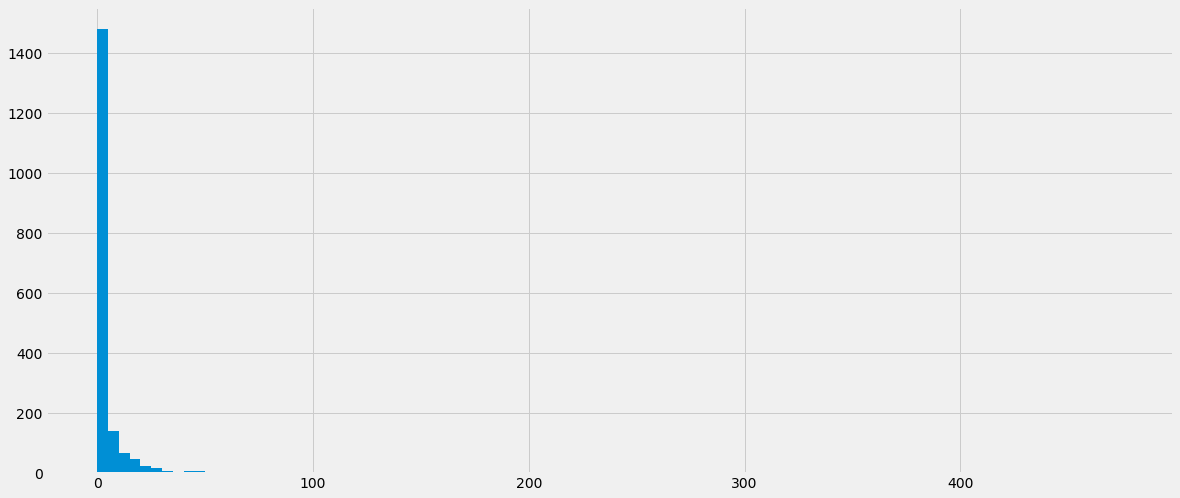

In [649]:
binsize = 5
bins = np.arange(0, df_combined.likes.max()+binsize, binsize)

plt.figure(figsize=[18, 8])
plt.hist(data = df_combined, x = 'likes', bins = bins)

plt.show()

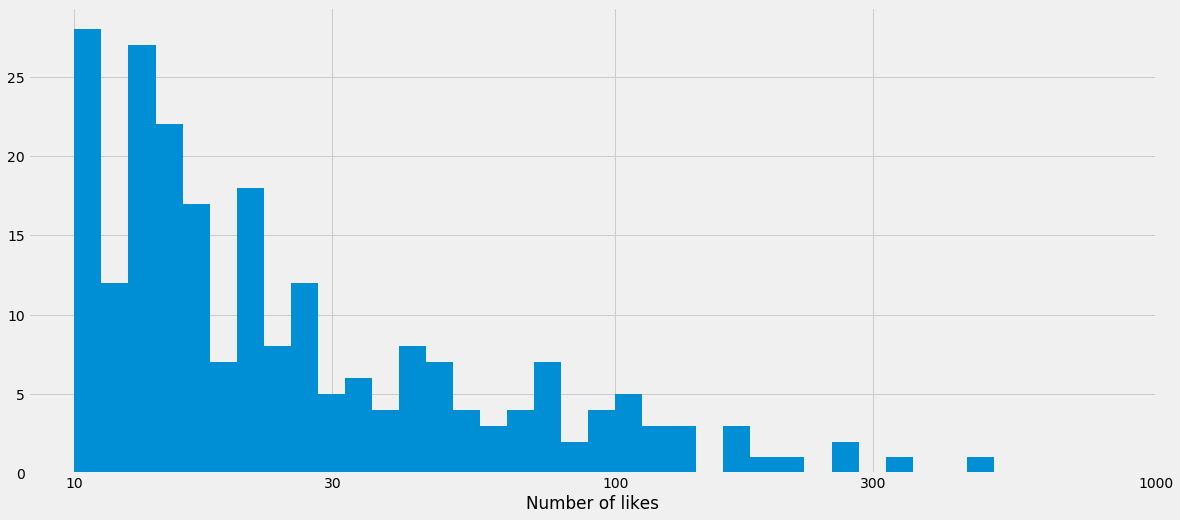

In [650]:
# transfer to a log scale figure

log_binsize = 0.05
bins = 10 ** np.arange(1, np.log10(df_combined.likes.max())+log_binsize, log_binsize)

plt.figure(figsize=[18, 8])
plt.hist(data = df_combined, x = 'likes', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000], [10, 30, 100, 300, 1000])
plt.xlabel('Number of likes')
plt.show()

In [651]:
# group the suburbs to 3 score groups according to the percentage of chinese restaurants 

bin_edges = [-1, 10, 20, 50, 500]
bin_names = [1,2,3,4]
df_combined['popularity'] = pd.cut(df_combined['likes'], bin_edges, labels=bin_names)
df_combined.popularity.value_counts()

1    1634
2     104
3      65
4      44
Name: popularity, dtype: int64

In [653]:
# convert the categorical values to numeric values for future modeling

df_combined.suburb_total = df_combined.suburb_total.astype(int)
df_combined.suburb_percent = df_combined.suburb_percent.astype(int)
df_combined.popularity  = df_combined.popularity .astype(int)

In [654]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 1846
Data columns (total 11 columns):
id                     1847 non-null object
suburb                 1847 non-null object
distance               1847 non-null float64
distance_to_central    1847 non-null float64
Chinese                1847 non-null int64
likes                  1847 non-null int64
price                  503 non-null float64
rating                 503 non-null float64
suburb_total           1847 non-null int64
suburb_percent         1847 non-null int64
popularity             1847 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 173.2+ KB


### 6.3 Exploratory data visualizations.

__Get the top 10 suburbs based on the total number of restaurants.__

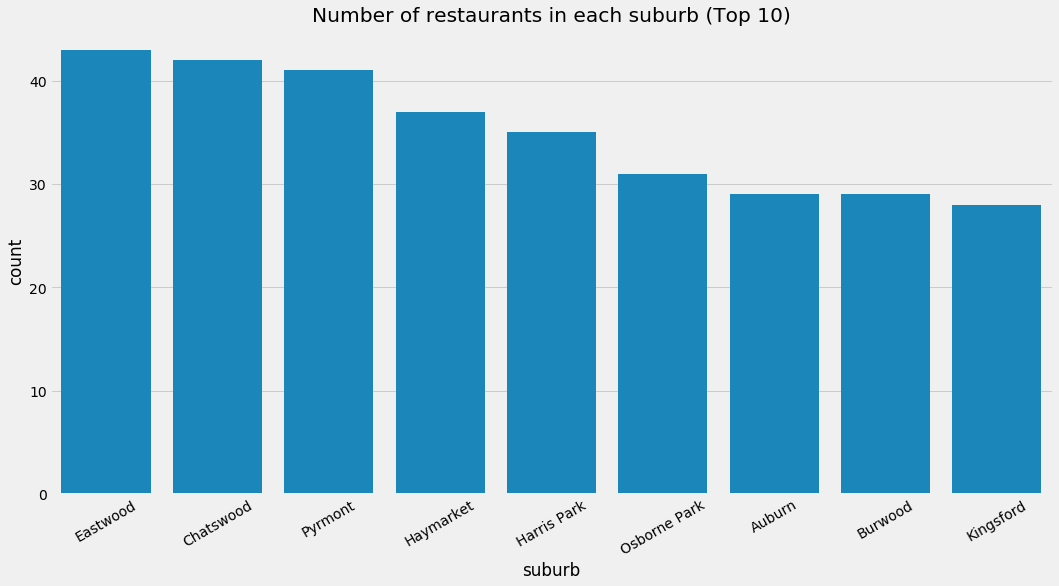

In [657]:
f,ax=plt.subplots(1,figsize=(16,8))
base_color = sns.color_palette()[0]

top10_all = df_combined[df_combined['suburb'].isin(df_combined['suburb'].value_counts().index[:9])]

g = sb.countplot(data = top10_all, x = 'suburb', order = top10_all['suburb'].value_counts().index, color = base_color)
ax.set_title('Number of restaurants in each suburb (Top 10)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

fig = ax.get_figure()
fig.savefig('Top 10_1.png')

__Get the top 10 suburbs based on the percentage of Chinese restaurants.__

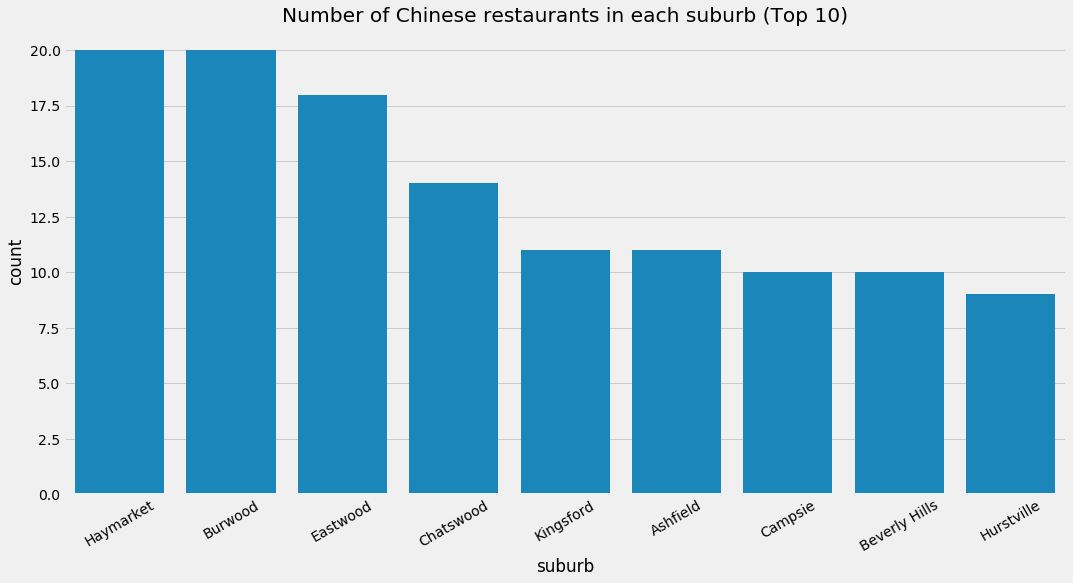

In [658]:
f,ax=plt.subplots(1,figsize=(16,8))
base_color = sns.color_palette()[0]

top10_chinese_list = df_combined[df_combined['Chinese'] == 1]['suburb'].value_counts().index[:9]
top10_chinese = df_combined[(df_combined['Chinese'] == 1) & (df_combined['suburb'].isin(top10_chinese_list))]

g = sb.countplot(data = top10_chinese, x = 'suburb', order = top10_chinese['suburb'].value_counts().index, color = base_color)
ax.set_title('Number of Chinese restaurants in each suburb (Top 10)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

fig = ax.get_figure()
fig.savefig('Top 10_2.png')

__Visulaize the percentage of Chinese restaurantst in top suburbs.__

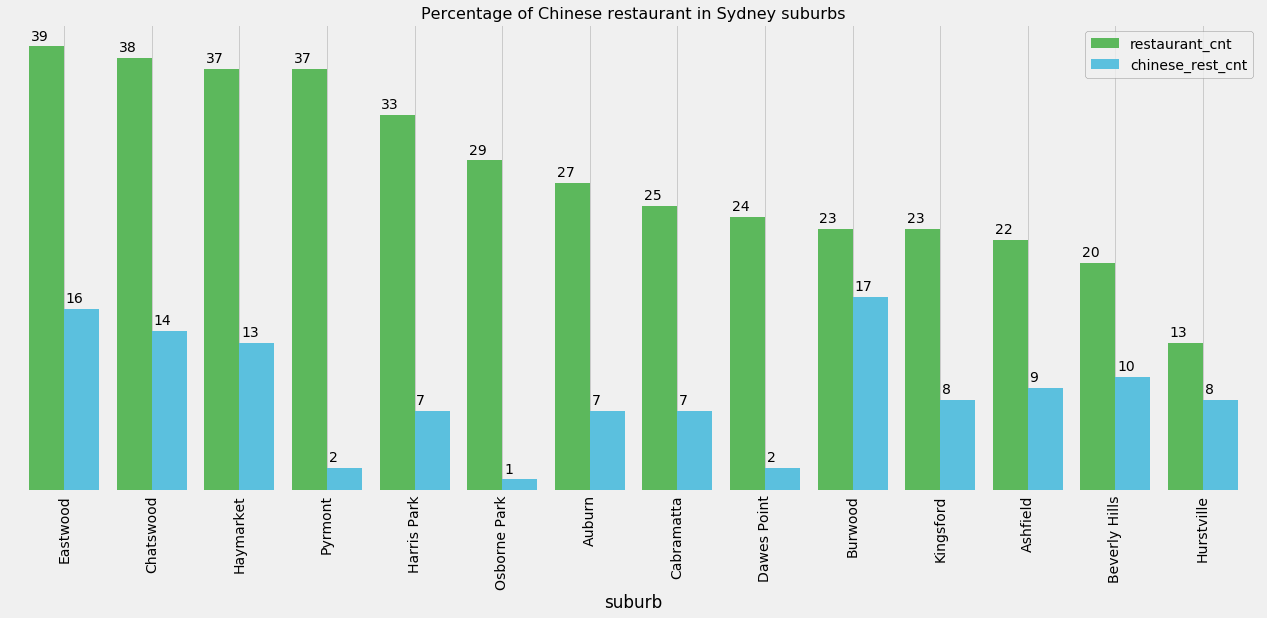

In [407]:
#show the figure
colors = ['#5cb85c', '#5bc0de']

ax = df_check[['restaurant_cnt','chinese_rest_cnt']].plot(kind='bar', figsize=(20, 8), width=0.8, color = colors, edgecolor = "none")

ax.set_title("Percentage of Chinese restaurant in Sydney suburbs", fontsize=16)
plt.xticks(fontsize=14)
ax.set_yticks([])
plt.legend(fontsize=14, edgecolor = "grey")

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+.6, \
            str(round(i.get_height(), 2)), fontsize=14,
                color='black')

plt.show()

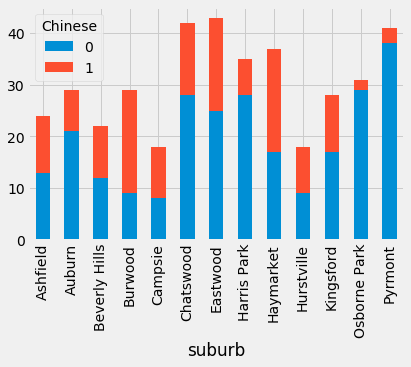

In [681]:
top_list = top10_all['suburb'].value_counts().index[:9].append(top10_chinese['suburb'].value_counts().index[:9])

df_top = df_combined[df_combined['suburb'].isin(top_list)].sort_values('suburb_percent').set_index('suburb')

df_top.groupby('suburb')['Chinese']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

__As expected, majority of the restaurants are within 30km of the central of the Sydney.__

In [711]:
df_combined.distance_to_central.describe()

count     1847.000000
mean     14913.946386
std      12879.780749
min        341.364565
25%       5539.464899
50%      12244.953708
75%      20095.671188
max      69978.560952
Name: distance_to_central, dtype: float64

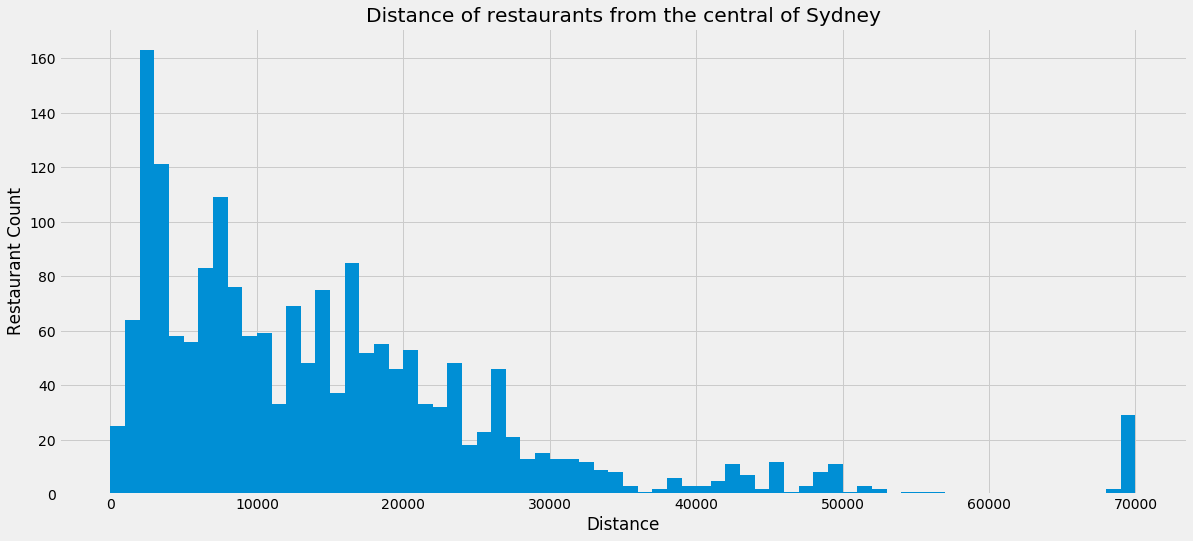

<Figure size 432x288 with 0 Axes>

In [713]:
# start with a standard-scaled plot

df_combined.distance_to_central = df_combined.distance_to_central.fillna(0.0)

binsize = 1000
bins = np.arange(0, df_combined.distance_to_central.max()+binsize, binsize)

plt.figure(figsize=[18, 8])
plt.hist(data = df_combined, x = 'distance_to_central', bins = bins)

plt.xlabel('Distance')
plt.ylabel('Restaurant Count')
plt.title('Distance of restaurants from the central of Sydney')

plt.show()
plt.savefig('Distance of restaurants from the central of Sydney')

__Look into the corelationships among all the numeric features based on the data of 1) all the restaurants; 2) only the Chinese restaurants.__

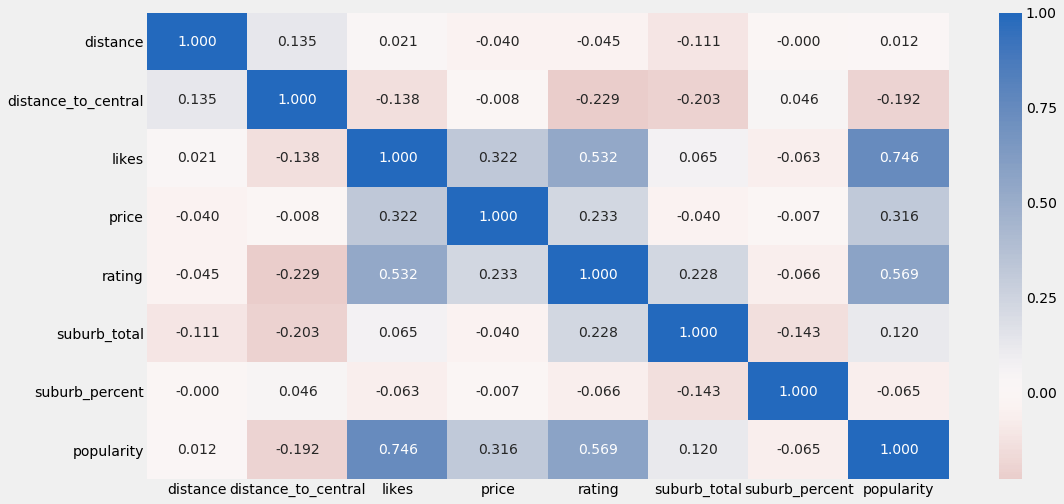

In [715]:
numeric_vars = ['distance', 'distance_to_central', 'likes', 'price', 'rating', 'suburb_total', 'suburb_percent', 'popularity']

# correlation plot
plt.figure(figsize = [16, 8])
sb.heatmap(df_combined[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()


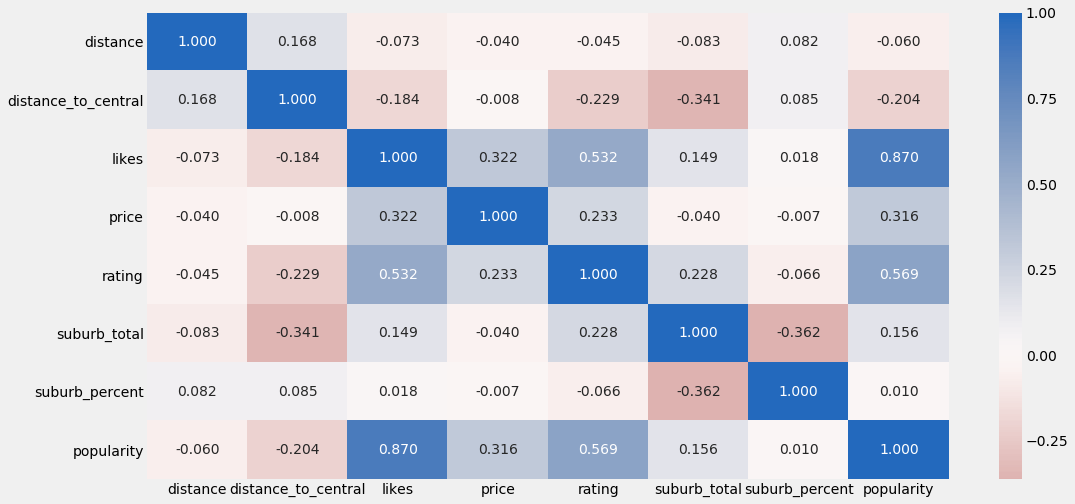

<Figure size 432x288 with 0 Axes>

In [716]:
numeric_vars = ['distance', 'distance_to_central', 'likes', 'price', 'rating', 'suburb_total', 'suburb_percent', 'popularity']

# correlation plot
plt.figure(figsize = [16, 8])

data = df_combined[df_combined['Chinese'] == 1]

sb.heatmap(data[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()
plt.savefig('Feature corelations')

## 7. Set up features and target, train Support Vector Machine (SVM) model to predict the popularity of a Chinese restaurant.

In [683]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix

In [697]:
# extract the final dataset for the model which contains only Chinese restaurants

df_final = df_combined[df_combined['Chinese'] == 1]

In [698]:
# select features

Feature = df_final[['distance', 'distance_to_central', 'Chinese', 'price', 'suburb_total', 'suburb_percent']]

Feature.head()
Feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 15 to 1846
Data columns (total 6 columns):
distance               503 non-null float64
distance_to_central    503 non-null float64
Chinese                503 non-null int64
price                  503 non-null float64
suburb_total           503 non-null int64
suburb_percent         503 non-null int64
dtypes: float64(3), int64(3)
memory usage: 27.5 KB


In [699]:
X = Feature
X[0:5]

,distance,distance_to_central,Chinese,price,suburb_total,suburb_percent
15,88.0,3123.446650,1,4.0,3,3
16,234.0,2961.011673,1,4.0,3,3
20,198.0,2958.611449,1,4.0,3,3
39,646.0,12634.587008,1,1.0,3,1
45,187.0,12338.688783,1,3.0,2,1


In [703]:
# select the target

y = df_final['popularity'].values
y[0:5]

array([4, 4, 4, 1, 4])

In [704]:
# data preprocessing and transformation

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.39195079, -1.15524681,  0.        ,  4.05268279,  0.79716439,
         1.21896485],
       [-0.89076634, -1.16971439,  0.        ,  4.05268279,  0.79716439,
         1.21896485],
       [-1.01434606, -1.16992817,  0.        ,  4.05268279,  0.79716439,
         1.21896485],
       [ 0.52353499, -0.30811884,  0.        , -0.10186771,  0.79716439,
        -1.57438057],
       [-1.05210654, -0.33447358,  0.        ,  2.66783263, -0.36507818,
        -1.57438057]])

In [705]:
#separate the training and test datasets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (402, 6) (402,)
Test set: (101, 6) (101,)


In [706]:
#SVM model

from sklearn import svm
popularity_svm = svm.SVC(kernel='rbf')
popularity_svm.fit(X_train, y_train) 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [707]:
yhat_svm = popularity_svm.predict(X_test)

In [717]:
# model evaluation using test set

print(jaccard_similarity_score(y_test, yhat_svm))

cnf_matrix = confusion_matrix(y_test, yhat_svm)
np.set_printoptions(precision= 2)

print (classification_report(y_test, yhat_svm))

0.9504950495049505
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        96
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

   micro avg       0.95      0.95      0.95       101
   macro avg       0.32      0.33      0.32       101
weighted avg       0.90      0.95      0.93       101



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
